In [11]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import cv2
import numpy as np
from glob import glob
from heapq import nlargest

In [12]:
paths = glob('../data/Biscuits/*.png')

In [34]:
def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_))+1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    hist = hist.astype('float')
    hist /= hist.sum()
    return hist


def show_colors(centers):
    fig = plt.figure()
    for i in range(len(centers)):
        c = centers[i]/255.
        fig.add_subplot(1, len(centers), i+1)
        plt.imshow([[(c[0], c[1], c[2])]])
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()
    
    
def get_best_color(centers, labels):
    
    num_labels = np.arange(0, len(np.unique(labels))+1)
    (hist, _) = np.histogram(labels, bins=num_labels)
    second_max = nlargest(2, hist)[1]
    second_max_idx = np.where(hist == second_max)[0][0]
    print("Best color index: {}".format(second_max_idx))
    
    return hist, centers[second_max_idx]

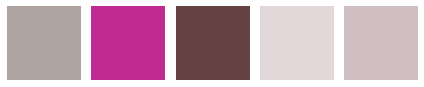

Best color index: 1
[213490 240553 111874 238669 424214]


In [38]:
img = cv2.imread('../data/Biscuits/test_2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.reshape(img.shape[0]*img.shape[1], -1)

clt = KMeans(n_clusters=5)
clt.fit(img)

show_colors(clt.cluster_centers_)

hist, bc = get_best_color(clt.cluster_centers_, clt.labels_)

print(hist)

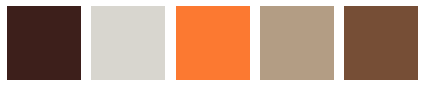

Best color index: 2


In [35]:
img = cv2.imread('../data/Biscuits/test_3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.reshape(img.shape[0]*img.shape[1], -1)

clt = KMeans(n_clusters=5)
clt.fit(img)

show_colors(clt.cluster_centers_)

hist, bc = get_best_color(clt.cluster_centers_, clt.labels_)

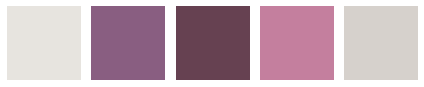

Best color index: 4


In [36]:
img = cv2.imread('../data/Biscuits/test_4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.reshape(img.shape[0]*img.shape[1], -1)

clt = KMeans(n_clusters=5)
clt.fit(img)

show_colors(clt.cluster_centers_)

hist, bc = get_best_color(clt.cluster_centers_, clt.labels_)